In [35]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
# Load the Keras model
model = load_model('TenDayAverageModel.keras')

In [72]:
data1 = pd.read_csv('/content/AMD_data.csv')
data2 = pd.read_csv('/content/BA_data.csv')
data3 = pd.read_csv('/content/V_data.csv')

In [77]:
data3

,Open,High,Low,Close,Volume,Label,TEN,HUNDREAD
0,0.014715,0.021799,0.011701,0.012342,1.000000,0,0.000000,0.000000
1,0.013744,0.018263,0.013938,0.019294,0.279190,0,0.000000,0.000000
2,0.021550,0.020649,0.015280,0.015202,0.209276,0,0.000000,0.000000
3,0.015669,0.017600,0.016013,0.018320,0.120891,0,0.000000,0.000000
4,0.017567,0.017803,0.017579,0.018949,0.058670,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
3969,0.987421,0.991947,0.994206,0.984378,0.004910,0,256.902333,241.335103
3970,0.981625,0.986144,0.995445,0.987265,0.000628,1,257.164333,241.532988
3971,0.984464,0.986263,0.994566,0.986355,0.003387,0,257.101808,241.750148
3972,0.981664,0.991000,0.995485,0.992169,0.001952,1,256.905308,241.969981


In [38]:
# copying the data
data_min_max_scaled = data1.copy()

# applying normalization techniques
for column in data_min_max_scaled.columns:
  if column in ['Volume','Open','High','Low','Close']:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())
data1 = data_min_max_scaled

In [39]:
# copying the data
data_min_max_scaled = data2.copy()

# applying normalization techniques
for column in data_min_max_scaled.columns:
  if column in ['Volume','Open','High','Low','Close']:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())
data2 = data_min_max_scaled

In [73]:
# copying the data
data_min_max_scaled = data3.copy()

# applying normalization techniques
for column in data_min_max_scaled.columns:
  if column in ['Volume','Open','High','Low','Close']:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())
data3 = data_min_max_scaled

In [78]:
data1arr = np.array(data1.drop(columns=['TEN','HUNDREAD']))
data2arr = np.array(data2.drop(columns=['TEN','HUNDREAD']))
data3arr = np.array(data3.drop(columns=['Label','TEN','HUNDREAD']))

In [43]:
data = []
temp = []
for i in range(0,len(data1arr)-10):
  for j in range(0,10):
    temp.append(data1arr[i+j])
  data.append(temp)
  temp = []
data_Arr1 = np.array(data)

In [44]:
data = []
temp = []
for i in range(0,len(data2arr)-10):
  for j in range(0,10):
    temp.append(data2arr[i+j])
  data.append(temp)
  temp = []
data_Arr2 = np.array(data)

In [79]:
data = []
temp = []
for i in range(0,len(data3arr)-10):
  for j in range(0,10):
    temp.append(data3arr[i+j])
  data.append(temp)
  temp = []
data_Arr3 = np.array(data)

In [80]:
np.shape(data_Arr1)

(6027, 10, 5)

In [47]:
np.shape(data_Arr2)

(6027, 10, 5)

In [81]:
np.shape(data_Arr3)

(3964, 10, 5)

In [49]:
data_Val1 = np.array(data1['TEN'])
data_Val1 = data_Val1[10:]

In [50]:
data_Val2 = np.array(data2['TEN'])
data_Val2 = data_Val2[10:]

In [82]:
data_Val3 = np.array(data3['TEN'])
data_Val3 = data_Val3[10:]

In [52]:
np.shape(data_Val1)

(6027,)

In [53]:
np.shape(data_Val2)

(6027,)

In [83]:
np.shape(data_Val3)

(3964,)

In [84]:
dataTest1= data_Arr1.reshape(6027,1,50)
dataTest2= data_Arr2.reshape(6027,1,50)
dataTest3= data_Arr3.reshape(3964,1,50)

In [85]:
valueTest1= data_Val1.reshape(6027,1,1)
valueTest2= data_Val2.reshape(6027,1,1)
valueTest3= data_Val3.reshape(3964,1,1)

In [59]:
model.fit(dataTest1,valueTest1,epochs=50)

Epoch 1/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 4.6584 - loss: 32.4077
Epoch 2/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.5075 - loss: 1.1645
Epoch 3/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.4358 - loss: 0.8353
Epoch 4/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - MeanAbsoluteError: 0.4363 - loss: 0.8024
Epoch 5/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3978 - loss: 0.7028
Epoch 6/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3969 - loss: 0.6543
Epoch 7/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.4200 - loss: 0.6247
Epoch 8/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3941 - loss: 0.6679
Epoch 9/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3712 - loss: 0.5946
Epoch 10/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3870 - loss: 0.6420
Epoch 11/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [60]:
model.fit(dataTest2,valueTest2,epochs=50)

Epoch 1/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 24.5800 - loss: 1944.4919
Epoch 2/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 1.2968 - loss: 4.4829
Epoch 3/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 1.2313 - loss: 4.4019
Epoch 4/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 1.1445 - loss: 4.3966
Epoch 5/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 1.1798 - loss: 4.0677
Epoch 6/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 1.2581 - loss: 4.5458
Epoch 7/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 1.1643 - loss: 4.0368
Epoch 8/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 1.1093 - loss: 4.0044
Epoch 9/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 1.1397 - loss: 3.9074
Epoch 10/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 1.2522 - loss: 4.8105
Epoch 11/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3

In [86]:
prediction = model.predict(dataTest3)

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [87]:
plotPred = []
for i in range(len(prediction)):
  plotPred.append(prediction[i][0][0])
plotVal = []
for i in range(len(valueTest3)):
  plotVal.append(valueTest3[i][0][0])

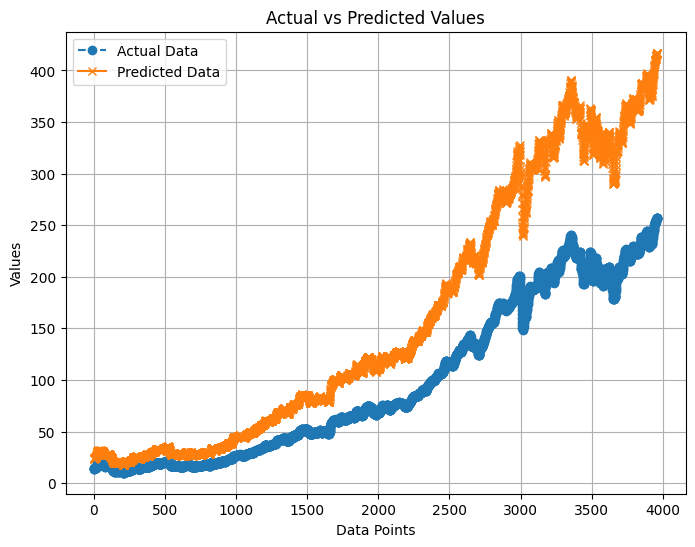

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(plotVal, label='Actual Data', marker='o', linestyle='--')
plt.plot(plotPred, label='Predicted Data', marker='x', linestyle='-')

# Add labels and legend
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [34]:
model.save('/content/TenDayAverageModel.keras')